# CS4442 - Assignment 3
## Author: Riley Lankshear | 250885525







# Question 2

In [8]:
# Importing packages to be used
import numpy as np
import pandas as pd
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from scipy import misc
from scipy import ndimage
from scipy import signal
import math
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image 
from numpy import asarray
from skimage import filters

kernelSize = 5
sigma = 1

### Importing images
* Import images
* resize the lion image 
* print out the shape of both images

In [9]:
img1 = "miss.png"
img2 = "lion.png"

miss = Image.open(img1).convert("L")
lion = Image.open(img2).convert("L")

tmpL = lion.resize((512,512))

missArr = np.asarray(miss)
lionArr = np.asarray(tmpL)

print("Woman image: ", missArr.shape)
print("Cat image: ", lionArr.shape)

('Woman image: ', (512, 512))
('Cat image: ', (512, 512))


### Plotting the imported images

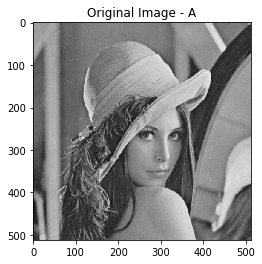

In [10]:
plt.figure()
plt.title("Original Image - A")
plt.imshow(missArr, cmap='gray', vmin=0, vmax=255)
plt.figure()
plt.title("Original Image - B")
plt.imshow(lionArr, cmap='gray', vmin=0, vmax=255)

# Gaussian 
### Gaussian Kernel function 
* Takes in the desired dimension and sigma and returns the gaussian kernel matrix of given size

In [11]:
def gaussianKernel(dimension, sigma):
    mu = 0.0
    x,y = np.meshgrid(np.linspace(-1,1,dimension), np.linspace(-1,1,dimension))
    calc = np.sqrt(x*x+y*y)
    gaussianArray = np.exp(-((calc-mu)**2/( 2.0 * sigma**2)))
    return gaussianArray

gausKernel = gaussianKernel(kernelSize,sigma)

### Original vs Gaussian smooth 
* Plotting the original image against the gaussian smoothed

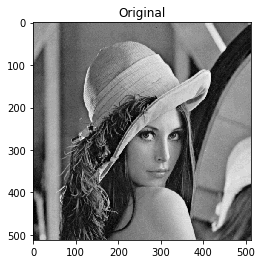

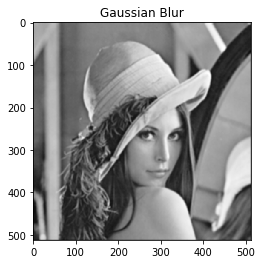

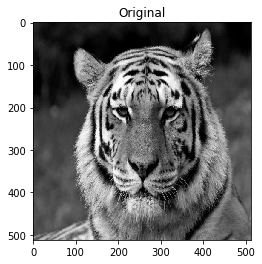

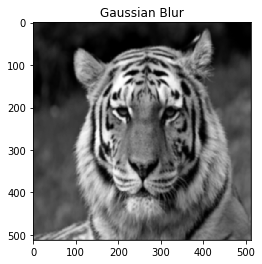

In [12]:
gaussMiss = signal.convolve2d(missArr, gausKernel, 'same')
gaussLion = signal.convolve2d(lionArr, gausKernel, 'same')

plt.figure()
plt.title("Original")
plt.imshow(missArr, cmap='gray')
plt.figure()
plt.title("Gaussian Blur")
plt.imshow(gaussMiss, cmap='gray')
plt.figure()
plt.title("Original")
plt.imshow(lionArr, cmap='gray')
plt.figure()
plt.title("Gaussian Blur")
plt.imshow(gaussLion, cmap='gray')

### Mean (box) filter
* Takes in desired dimension of the box kernel 
* Returns the mean (box) kernel matrix 

In [13]:
def boxKernel(dimension):
    box = np.zeros((dimension, dimension))
    avg = 1.0/(dimension*dimension)
    box.fill(avg)
    return box

boxKernel = boxKernel(kernelSize)

### Original vs Box filter 

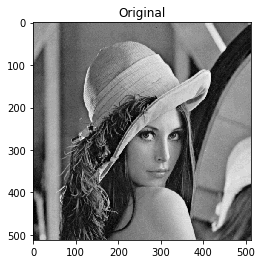

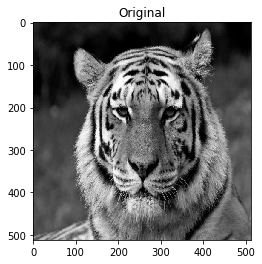

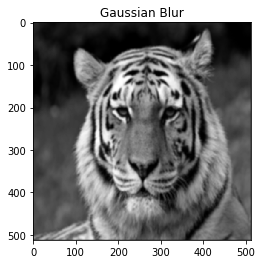

In [14]:
boxMiss = signal.convolve2d(missArr, boxKernel, 'same')
boxLion = signal.convolve2d(lionArr, boxKernel, 'same')

plt.figure()
plt.title("Original")
plt.imshow(missArr, cmap='gray')
plt.figure()
plt.title("Gaussian Blur")
plt.imshow(boxMiss, cmap='gray')
plt.figure()
plt.title("Original")
plt.imshow(lionArr, cmap='gray')
plt.figure()
plt.title("Gaussian Blur")
plt.imshow(boxLion, cmap='gray')

### Gaussian VS Box filter

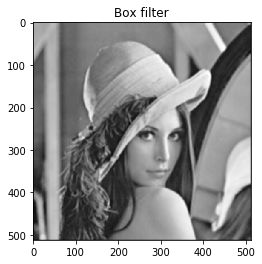

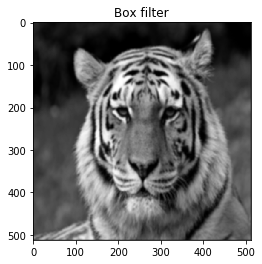

In [15]:
guassVsBox = [gaussMiss, boxMiss, gaussLion, boxLion]
count = 0
for i in guassVsBox:
    plt.figure()
    if (count%2 == 0):
        plt.title("Gaussian filter")
    else:
        plt.title("Box filter")
    count+=1
    plt.imshow(i, cmap='gray')

### Gaussian Sigma Test 
* Will test the results of the gaussian with varrying sigma values

/Users/Riley/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


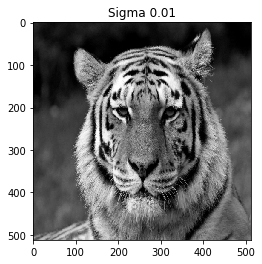

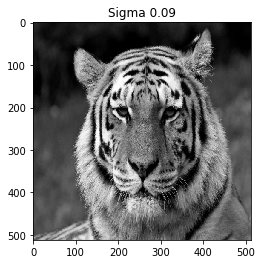

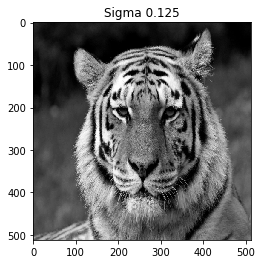

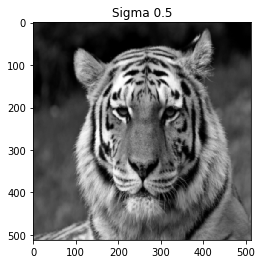

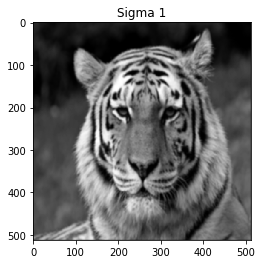

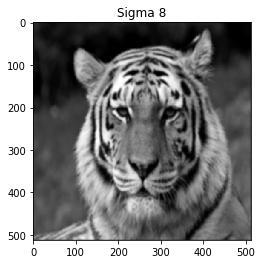

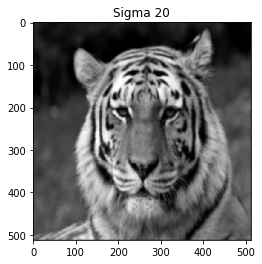

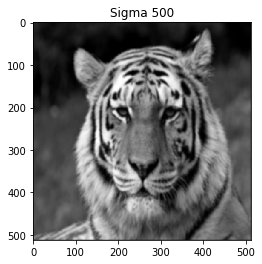

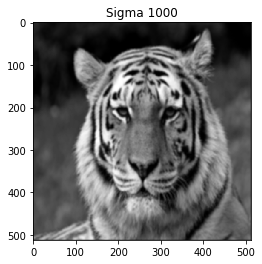

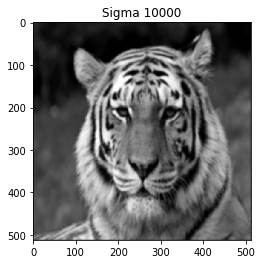

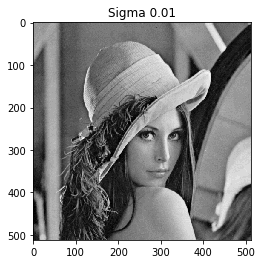

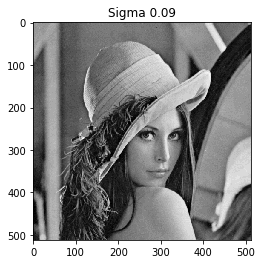

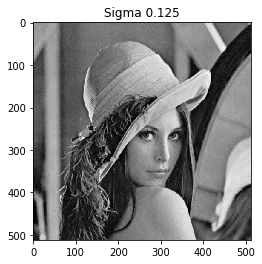

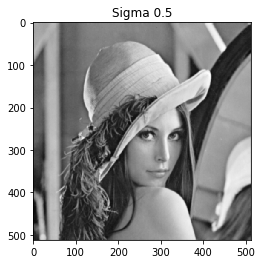

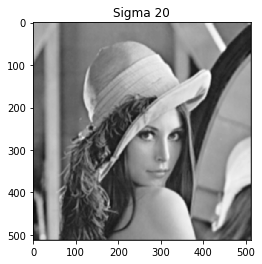

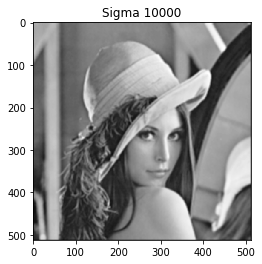

In [16]:
sigmas = [0.01,0.09,0.125,0.25,0.5,1,8,20,500,1000,10000]

for i in sigmas:
    tmp = gaussianKernel(kernelSize, i)
    
    gaussianLion = signal.convolve2d(lionArr, tmp, 'same')
    
    plt.figure()
    plt.title("Sigma " + str(i))
    plt.imshow(gaussianLion, cmap='gray')

for i in sigmas:
    tmp = gaussianKernel(kernelSize, i)
    
    gaussianLion = signal.convolve2d(missArr, tmp, 'same')
    
    plt.figure()
    plt.title("Sigma " + str(i))
    plt.imshow(gaussianLion, cmap='gray')

    


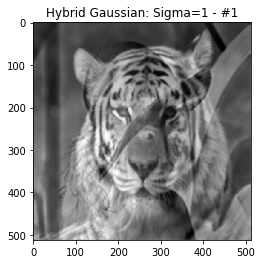

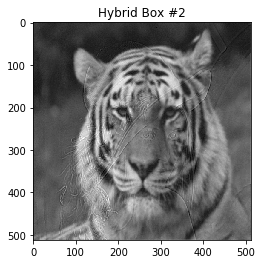

In [17]:



hybridGauss1 = gaussMiss + (lionArr-gaussLion)
hybridGauss2 = gaussLion + (missArr-gaussMiss)

hybridBox1 = boxMiss + (lionArr-boxLion)
hybridBox2 = boxLion + (missArr-boxMiss)

toShow = [hybridGauss1, hybridBox1, hybridGauss2, hybridBox2]

count = 0

for i in toShow:
    
    plt.figure()
    
    if (count%2 == 0):
        plt.title("Hybrid Gaussian: Sigma=1 - #" + str((count)%2+1))
    else:
        plt.title("Hybrid Box #" + str((count)%2+1))
    
    plt.imshow(i, cmap='gray')
    
    count+=1

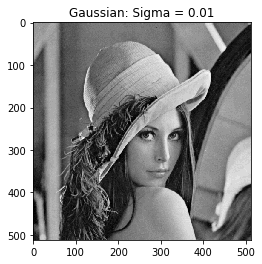

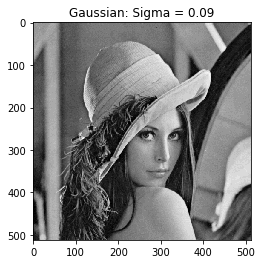

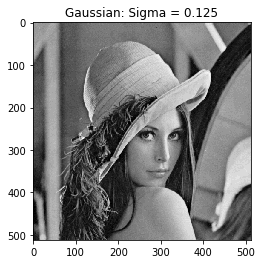

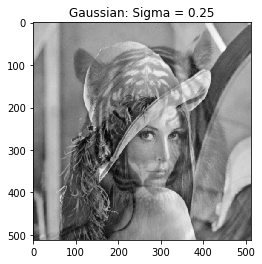

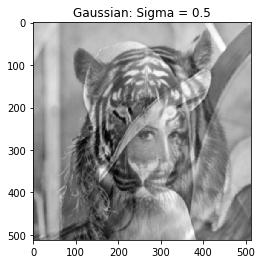

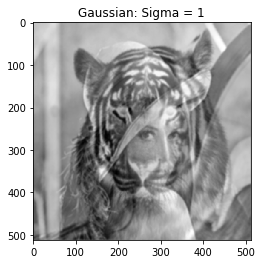

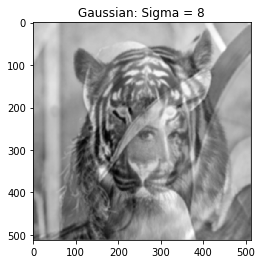

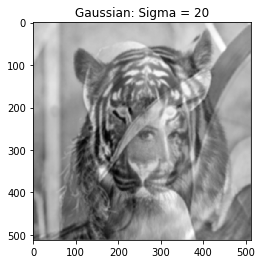

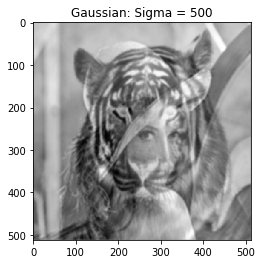

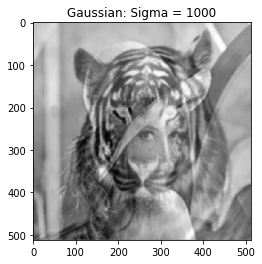

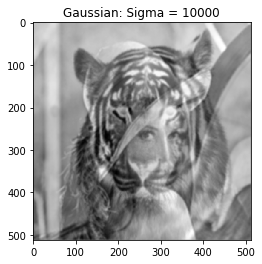

In [18]:
for i in sigmas:
    gKernel = gaussianKernel(kernelSize, i)
    
    blurA = signal.convolve2d(lionArr, gKernel, 'same')
    blurB = signal.convolve2d(missArr, gKernel, 'same')
    
    out = blurB + (lionArr-blurA)
    
    plt.figure()
    plt.title("Gaussian: Sigma = " + str(i) )
    
    plt.imshow(out, cmap='gray')
    

### Q2 Conclusions

####     Gaussian Vs Box
* I found that the gaussian filter made a smoother image than the box or mean filter
#### Various sigmas
* The affect of changing the sigma is most notable between very small sigmas (0.01) and sigmas > 1. With a sigma of 0.01 the image becomes very grainy and not smooth. The visual differences between sigmas > 1 is largely not noticable. 
#### Amount of bluring and results
* The amount of bluring noticeably affects image A (the lion), in the case above. With small sigmas like; 0.01, 0.09, 0.125 image A is not seen wihtin the hybrid image. However, somewhere between 0.125 and 0.25 sigmas the image A becomes prevelant and with increasing sigmas the lion gets increasingly visible while the woman gets less noticable.

# Question 2 - Fin.

# Question 3

In [20]:
img1 = "einsteinandwho.png"

tmp = Image.open(img1).convert("L")

einsteinAndWho = np.asarray(tmp)

print("Marilyn-Einstein image: ", einsteinAndWho.shape)

('Marilyn-Einstein image: ', (400, 352))


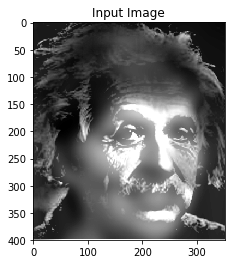

In [21]:
plt.figure()
plt.title("Input Image")
plt.imshow(einsteinAndWho, cmap='gray')


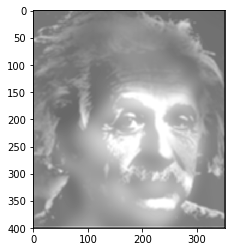

In [22]:
prac = gaussianKernel(5,13)
attempt = 1-prac
einstein = signal.convolve2d(einsteinAndWho, prac, 'same')

plt.imshow(einstein, cmap='gray')

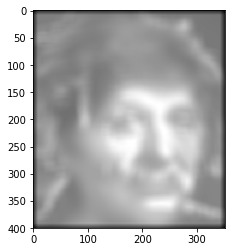

In [23]:
test = gaussianKernel(19,10000)
other = signal.convolve2d(einsteinAndWho, test, 'same')
plt.imshow(other, cmap='gray')

* Is the other person Michael Cera???


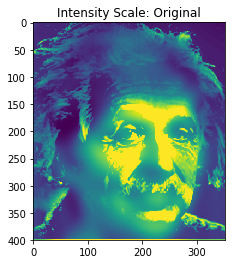

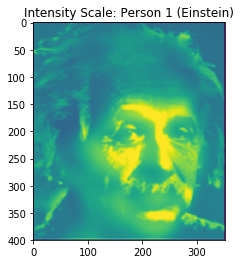

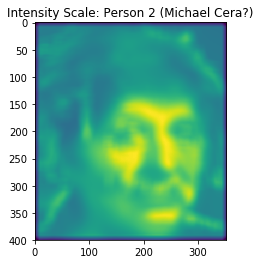

In [24]:
# scale image's intensity to [0,1] with mean value of 0.5 for better visualization.\n,
def intensityscale(raw_img):
        
    # scale an image's intensity from [min, max] to [0, 1].\n,
    v_min, v_max = raw_img.min(), raw_img.max()
    scaled_im = (raw_img * 1.0 - v_min) / (v_max - v_min)
        
    # keep the mean to be 0.5.\n,
    meangray = np.mean(scaled_im)
    scaled_im = scaled_im - meangray + 0.5
        
    # clip to [0, 1]\n,
    scaled_im = np.clip(scaled_im, 0, 1)
        
    return scaled_im
    
plt.figure()
plt.title("Intensity Scale: Original")
tmp = Image.open("einsteinandwho.png").convert("L")
im = np.asarray(tmp)
im_scaled = intensityscale(im)
plt.imshow(im_scaled)
plt.show()

plt.figure()
plt.title("Intensity Scale: Person 1 (Einstein)")
ein_scaled = intensityscale(einstein)
plt.imshow(ein_scaled)

plt.figure()
plt.title("Intensity Scale: Person 2 (Michael Cera?)")
other_scaled = intensityscale(other)
plt.imshow(other_scaled)
    
# TODO

### Remarks
* I found that a higher sigma and convolution matrix size in the gaussian kernel produced a better portray of the second figure in the image
* Einstein was brought out more using a lower sigma at around sigma=13 with a smaller convolution matrix size
* I beleive the second image might be of Michael Cera the actor?

# Question 3 - Fin.